In [50]:
import numpy as np
import tensorflow
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,SimpleRNN
import pandas as pd
from sklearn.model_selection import train_test_split
import jieba
import json
import pandas as pd
import os
import keras
from keras.preprocessing.text import Tokenizer
import string
from keras.models import Sequential
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [51]:
datanews = pd.read_excel(r"C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度.xls")
train_data, test_data, train_targets, test_targets = train_test_split(datanews.loc[:, ["seg"]] , datanews.loc[:, ["credLimit_group"]] , test_size=0.3,shuffle = True)

# 做onehot

In [52]:
from keras.preprocessing.text import Tokenizer

In [53]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=64)# 建立1000維向量

tokenizer.fit_on_texts(train_data["seg"])
train_data = tokenizer.texts_to_matrix(train_data["seg"],mode='binary')

tokenizer.fit_on_texts(test_data["seg"])
sequences = tokenizer.texts_to_sequences (test_data["seg"])
test_data = tokenizer.texts_to_matrix(test_data["seg"],mode='binary')

In [38]:
#詞編號
word_index = tokenizer.word_index

In [39]:
#解碼
# reverse_word_index = dict([(value, key) for(key, value) in word_index.items()])
# decoded_newswire = ' '.join([reverse_word_index.get(i,'?')for i in sequences[1]])

In [55]:
train_targets = np.array(train_targets).astype(int)
test_targets = np.array(test_targets).astype(int)

In [57]:
def to_one_hot(labels, dimension=5):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results
train_targets = to_one_hot(train_targets)
test_targets = to_one_hot(test_targets)

In [42]:
#模型定義
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(64, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))#因有5個類別,輸出5維
#編譯模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
# #LSTM
# max_features = 10000
# maxlen = 500
# from keras.layers import LSTM
# models = Sequential()
# model.add(Embedding(max_features,32))
# model.add(LSTM(32))
# model.add(Dense(5,activation='softmax'))

# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#              metrics=['accuracy'])


In [24]:
# history = model.fit(train_data,train_targets,
#                    epochs=10,
#                    batch_size=8,
#                    validation_data=(test_data, test_targets)
# )

ValueError: An operation has `None` for gradient. Please make sure that all of your ops have a gradient defined (i.e. are differentiable). Common ops without gradient: K.argmax, K.round, K.eval.

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [43]:
#fit(訓練)
history = model.fit(train_data,
                    train_targets,
                    epochs=20,
                    batch_size=4,
                    validation_data=(test_data, test_targets)
)

Train on 1427 samples, validate on 612 samples
Epoch 1/20
1427/1427 [==============================] - 1s 355us/step - loss: 1.5348 - accuracy: 0.3048 - val_loss: 1.5223 - val_accuracy: 0.3252
Epoch 2/20
1427/1427 [==============================] - 0s 274us/step - loss: 1.4668 - accuracy: 0.3357 - val_loss: 1.5160 - val_accuracy: 0.3252
Epoch 3/20
1427/1427 [==============================] - 0s 270us/step - loss: 1.4378 - accuracy: 0.3539 - val_loss: 1.5399 - val_accuracy: 0.2745
Epoch 4/20
1427/1427 [==============================] - 0s 269us/step - loss: 1.3981 - accuracy: 0.3805 - val_loss: 1.6308 - val_accuracy: 0.3023
Epoch 5/20
1427/1427 [==============================] - 0s 269us/step - loss: 1.3710 - accuracy: 0.3924 - val_loss: 1.6437 - val_accuracy: 0.2761
Epoch 6/20
1427/1427 [==============================] - 0s 270us/step - loss: 1.3390 - accuracy: 0.4156 - val_loss: 1.5783 - val_accuracy: 0.3007
Epoch 7/20
1427/1427 [==============================] - 0s 267us/step - loss:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from c

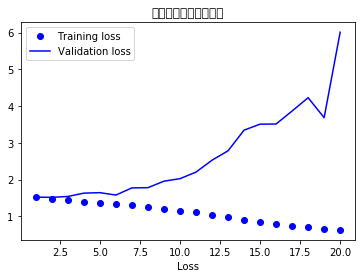

In [44]:
#繪圖

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('訓練與驗證的損失函數')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

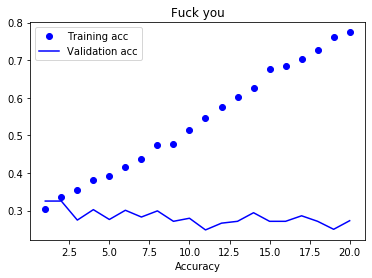

In [45]:
plt.clf()
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Fuck you')
plt.xlabel('Epohs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()